In [1]:
import numpy as np; 
import matplotlib.pyplot as plt;
import cv2;

---

## Bit Plane Slicing

In [79]:
## imshow function

def imshow(img, title=None):
    plt.imshow(img, 'gray');
    plt.title(title);
    plt.axis('off');
    plt.show();

### Background

In [68]:
# Finding the 8th bit value of a pixel value

pixel_value = 150;
bin_value = np.binary_repr(pixel_value, width=8);
bit8_value = int(bin_value[0]);

print(f"Example, pixel value is : ", pixel_value);
print(f"Binary value of {pixel_value} : ", bin_value, " Data type : ", type(bin_value));
print(f"8th bit value of {pixel_value} : ", bit8_value);

Example, pixel value is :  150
Binary value of 150 :  10010110  Data type :  <class 'str'>
8th bit value of 150 :  1


### A vectorized function to find the specific bit value for all pixels in the image

In [38]:
### Function to extract a specific bit-plane from a pixel's binary representation
def bitPlaneSlicing(img, bit_plane):
    bin_values = np.binary_repr(img, width=8);
    return int(bin_values[8-bit_plane]);

### Vectorize the bitPlaneSlicing function to apply it element-wise on an image array
bitPlaneSlicingVec = np.vectorize(bitPlaneSlicing);

### Example of Bit Plane Slicing on a Real Image

In [ ]:
img = cv2.imread(r"images\Fig0314(a)(100-dollars).tif", 0);
imshow(img, "Original Image");

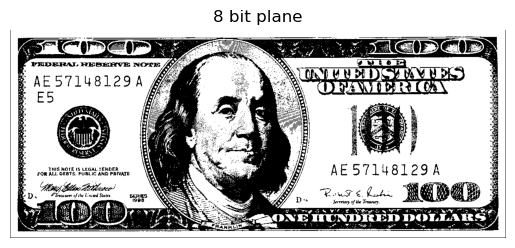

In [43]:
# 8th bit (most significant bit) plane

bit8_plane = bitPlaneSlicingVec(img, 8);
imshow(bit8_plane, "8 bit plane");

In [39]:
# bit planes of all bits

# bit8_plane = bitPlaneSlicingVec(img, 8)
bit7_plane = bitPlaneSlicingVec(img, 7)
bit6_plane = bitPlaneSlicingVec(img, 6)
bit5_plane = bitPlaneSlicingVec(img, 5)
bit4_plane = bitPlaneSlicingVec(img, 4)
bit3_plane = bitPlaneSlicingVec(img, 3)
bit2_plane = bitPlaneSlicingVec(img, 2)
bit1_plane = bitPlaneSlicingVec(img, 1)

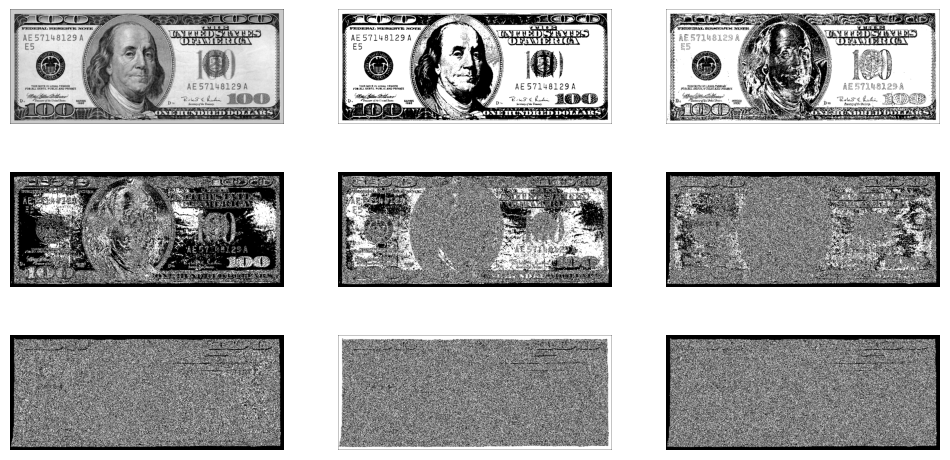

In [42]:
## Displaying All Images

fig, ax = plt.subplots(3,3, figsize=(12,6));
images = [img, bit8_plane, bit7_plane, bit6_plane, bit5_plane, bit4_plane, bit3_plane, bit2_plane, bit1_plane]

im = 0;
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(images[im], 'gray');
        ax[i,j].axis('off');
        im += 1;

----

## Histogram Processing
* A histogram in image processing is a graphical representation of the distribution of pixel intensities in an image.
* It shows the frequency of each intensity value in the image, where:
    * The x-axis represents the intensity levels.
    * The y-axis represents the number of pixels for each intensity.
* Histograms are widely used to analyze image contrast, brightness, and the overall intensity distribution, helping in tasks like image enhancement and thresholding.

### Example

In [62]:
# Create a 4x4 3-bit grayscale image (pixel values range from 0 to 7)
image = np.array([
    [0, 5, 2, 3],
    [4, 5, 6, 7],
    [5, 4, 2, 3],
    [4, 5, 6, 2]
])

In [63]:
## Manually finding the frequency of each pixel

unique_pixels = [0, 1, 2, 3, 4, 5, 6, 7];
pixels_freq  =  [1, 0, 3, 2, 3, 4, 2, 1];

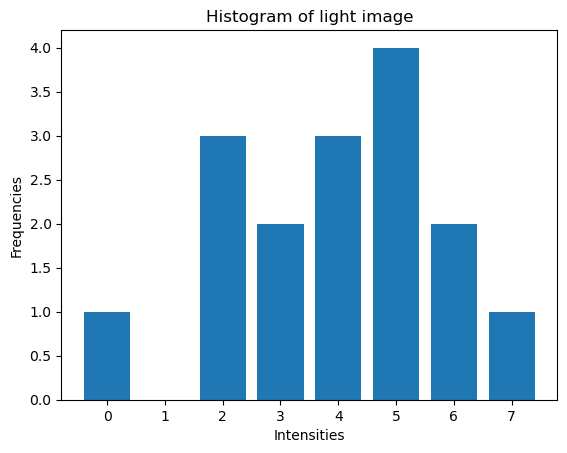

In [64]:
# Display the histogram

plt.bar(unique_pixels, pixels_freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of light image");
plt.show();

### Create a function to find pixel intensity frequencies

In [65]:
## This method find the frequency of all pixels from 0 to 255
## The function returns two lists: 
#      1. with unique pixel values from 0 to 255
#      2. with their corresponding frequencies.

def freq_counter(img):
    key_freq = {};
    for i in range(256):
        key_freq[i] = img[img == i].size;
    return np.array(list(key_freq.keys())), np.array(list(key_freq.values()));

### Histogram of a grayscale image

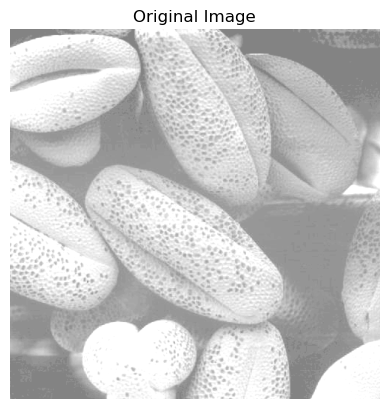

In [66]:
img = plt.imread(r"images\Fig0316(1)(top_left).tif");

plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title("Original Image");
plt.axis('off');
plt.show();

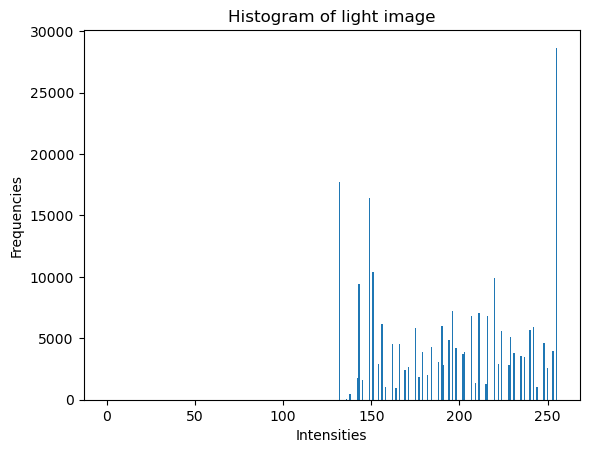

In [67]:
unique_pixels,   frequencies = freq_counter(img);

plt.bar(unique_pixels, frequencies);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of light image");
plt.show();

### Normalized Histogram

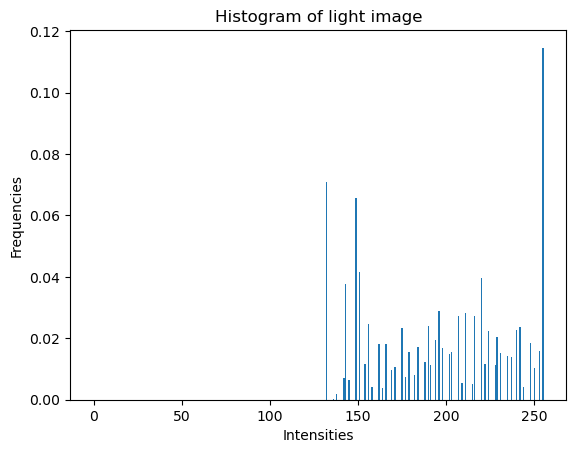

In [85]:
total_pix = img.size;

pixels, freq = freq_counter(img);
norm_freq = freq/total_pix;

plt.bar(pixels, norm_freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of light image");
plt.show();

## Histogram Equalization

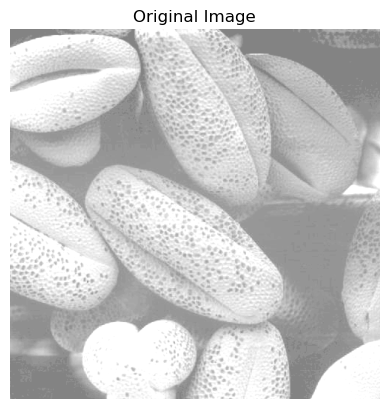

In [86]:
img = plt.imread(r"images\Fig0316(1)(top_left).tif");

plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title("Original Image");
plt.axis('off');
plt.show();

In [87]:
pixels, freq = freq_counter(img);

In [88]:
total_pix = img.size;

In [89]:
pdf =freq/total_pix

In [90]:
cdf = np.cumsum(pdf)

In [91]:
norm_cdf = cdf/np.max(cdf)

In [92]:
norm_cdf = np.round(cdf*255);

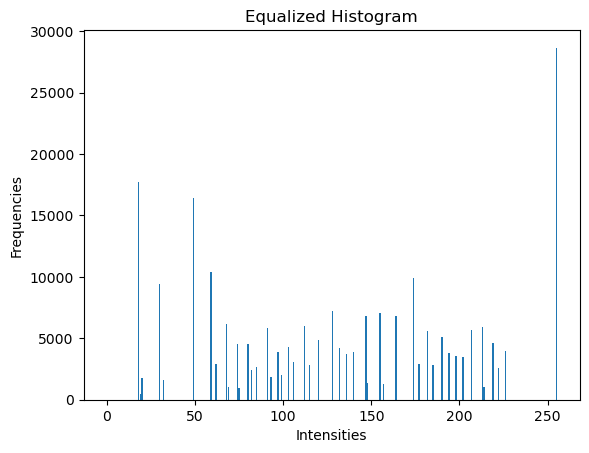

In [93]:
plt.bar(norm_cdf, freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Equalized Histogram");
plt.show();

----